<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0627_session_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [캐글 필사] Flower Recognition CNN Keras

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.listdir('/content/drive/MyDrive/2022-1 ESAA/데이터/flowers')

['dandelion', 'rose', 'sunflower', 'tulip', 'daisy']

## **1) Importing Various Modules 다양한 모듈 불러오기**'

텐서플로 백엔드 사용

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

## **2) Preparing the Data 데이터셋 준비**

### 2.1) Making the functions to get the training and validation set from the Images

In [3]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/2022-1 ESAA/데이터/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/2022-1 ESAA/데이터/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/2022-1 ESAA/데이터/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/2022-1 ESAA/데이터/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/2022-1 ESAA/데이터/flowers/rose'

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:13<00:00, 57.40it/s] 

764


In [7]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:13<00:00, 54.63it/s] 

1497


In [8]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:20<00:00, 46.91it/s] 

2481


In [9]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:24<00:00, 43.58it/s] 

3533


In [10]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:15<00:00, 51.07it/s] 

4317


### 2.2) Visualizing some Random Images

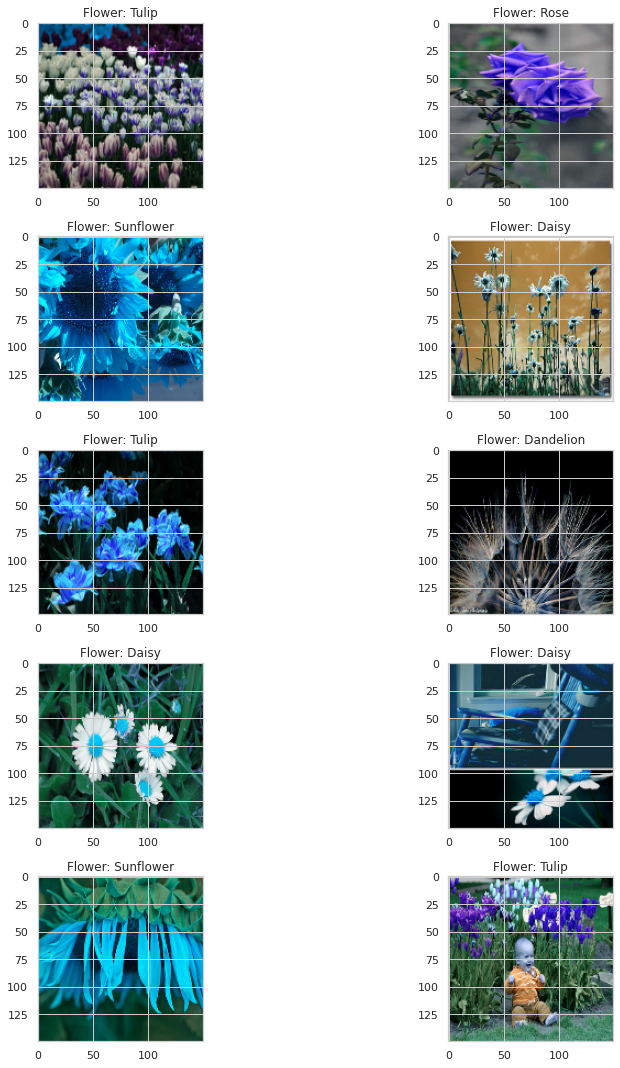

In [11]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### 2.3) Label Encoding the Y array & One Hot Encoding

- 데이지: 0
- 장미: 1
- 단델리온: 2
- 등등

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

### 2.4) Splitting into Training and Validation Sets

In [13]:
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.25, random_state=42)

### 2.5) Setting the Random Seeds

In [15]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

## **3) Modelling 모델링**

### 3.1) Building the ConvNet Model

In [16]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

### 3.2) Using a LR Annealer

참고: https://hiddenbeginner.github.io/deeplearning/paperreview/2020/01/04/paper_review_AdamWR.html

In [17]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

### 3.3) Data Augmentation to prevent Overfitting

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # 10도씩 이미지 돌리기
        zoom_range=0.1, # 이미지 줌 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # 랜덤하게 가로로 뒤집기
        vertical_flip=False)  # 랜덤하게 세로로 뒤집기


datagen.fit(x_train)

### 3.4) Compiling the Keras Model & Summary

In [19]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

### 3.5) Fitting on the Training set and making predcitons on the Validation set

In [21]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
25/25 [==============================] - 31s 723ms/step - loss: 1.4523 - accuracy: 0.3451 - val_loss: 1.1782 - val_accuracy: 0.4769
Epoch 2/50
25/25 [==============================] - 22s 882ms/step - loss: 1.1838 - accuracy: 0.4821 - val_loss: 1.0814 - val_accuracy: 0.5648
Epoch 3/50
25/25 [==============================] - 19s 767ms/step - loss: 1.0808 - accuracy: 0.5709 - val_loss: 1.0163 - val_accuracy: 0.6046
Epoch 4/50
25/25 [==============================] - 15s 590ms/step - loss: 1.0087 - accuracy: 0.5983 - val_loss: 0.9212 - val_accuracy: 0.6241
Epoch 5/50
25/25 [==============================] - 15s 604ms/step - loss: 0.9432 - accuracy: 0.6333 - val_loss: 0.9511 - val_accuracy: 0.6343
Epoch 6/50
25/25 [==============================] - 15s 631ms/step - loss: 0.9300 - accuracy: 0.6404 - val_loss: 0.8952 - val_accuracy: 0.6583
Epoch 7/50
25/25 [==============================] - 15s 591ms/step - loss: 0.8559 - accuracy: 0.6671 - val_loss: 0.8361 - val_accuracy: 0.6657

## **4) Evaluating the Model Performance 모델 성능 평가**

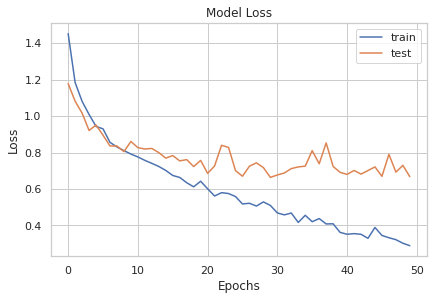

In [22]:
#loss 그래프
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

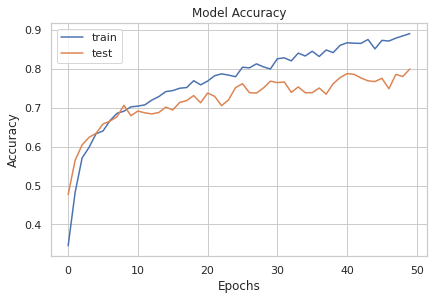

In [25]:
#정확도 그래프
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## **5) Visualizing Predictions on the Validation Set 검증 세트에 예측한 결과 시각화** 

In [26]:
# 검증 세트에 예측 실행
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [27]:
# 알맞게 분류된 인덱스와 알맞지 않게 분류된 인덱스 모두 기입
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

알맞게 분류된 꽃 이미지들 출력

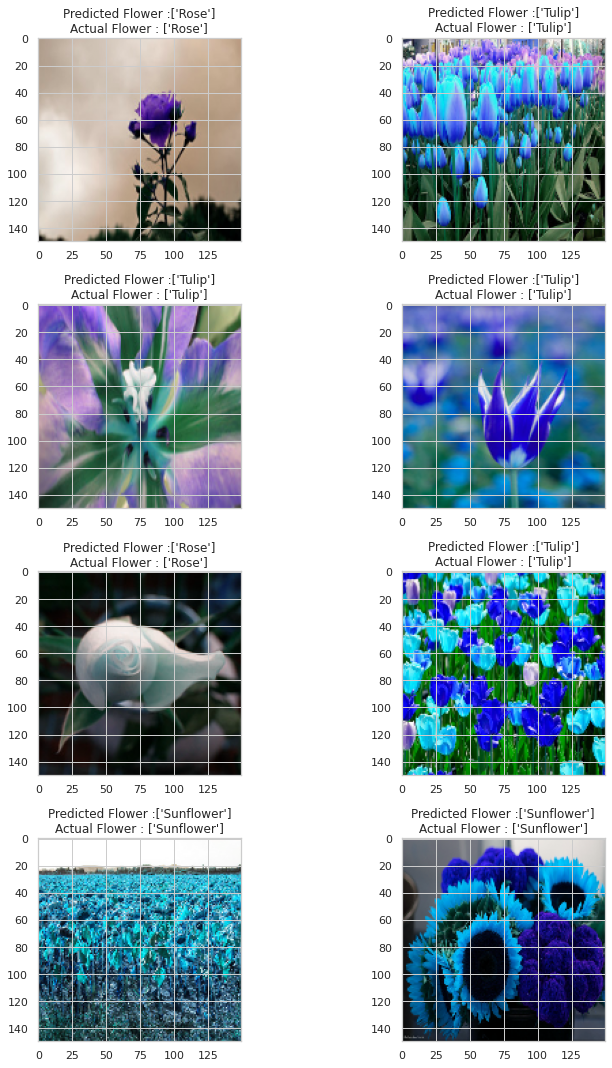

In [31]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

알맞지 않게 분류된 꽃 이미지들 출력

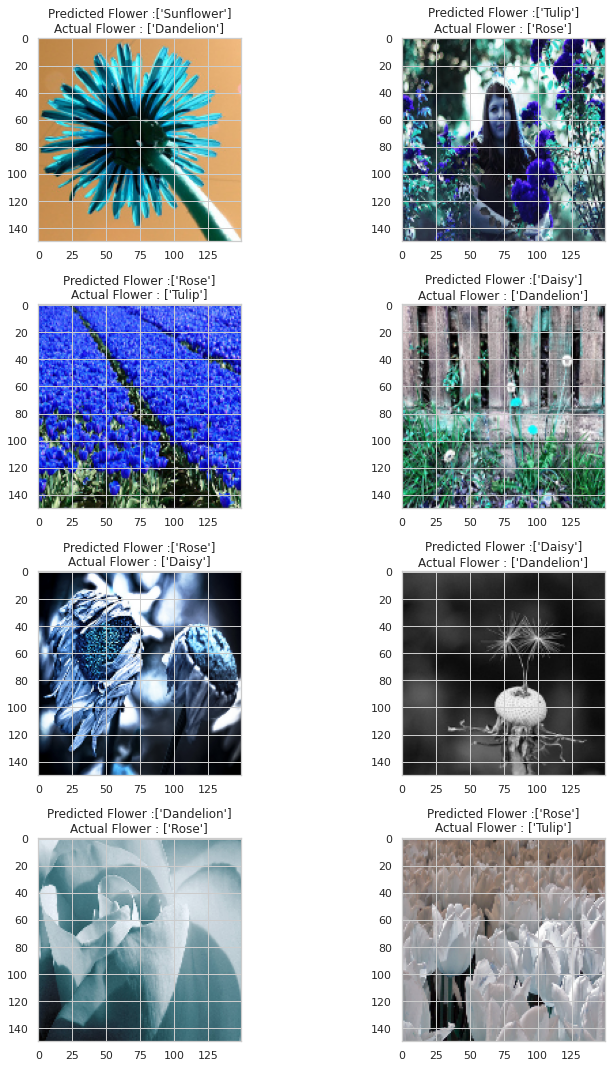

In [34]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1